# Master EDA (In Progress)

## Overall Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# So the column name outputs down get truncated
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 120)

## Exploring FSIS Data

### Import Data

In [2]:
FSIS_DATA = "../../data/fsis-processors-with-location.csv"
df_FSIS = pd.read_csv(FSIS_DATA)
df_FSIS.head(2)

,Unnamed: 0,EstNumber,EstID,Parent Corporation,Establishment Name,State,Size,Animals Processed,Processed\nVolume\nCategory,Slaughter\nVolume\nCategory,Full Address,latitude,longitude
0,0,M267,4802,JBS,JBS Tolleson Inc.,AZ,Large,Beef,5.0,4.0,"651 S. 91st Ave, Tolleson, AZ 85353",33.441660,-112.252559
1,1,M354,5117,Cargill,Cargill Meat Solutions,CA,Large,Beef,5.0,4.0,"3115 S. Fig Ave., Fresno, CA 93706",36.689651,-119.801950


### What animals are processed by these plants?

In [3]:
print("There are", len(df_FSIS), "plants in this dataset")
df_FSIS["Animals Processed"].value_counts()

There are 1149 plants in this dataset


Beef,Pork,Sheep/Lamb                   420
Chicken                                184
Beef                                   141
Pork                                   107
Beef,Pork                               92
Beef,Sheep/Lamb                         66
Turkey                                  39
Chicken,Turkey                          29
Turkey,Chicken                          21
Sheep/Lamb                              17
Beef,Pork,Chicken,Turkey,Sheep/Lamb     11
Beef,Pork,Sheep/Lamb,Chicken,Turkey      5
Sheep/Lamb,Pork                          5
Beef,Pork,Chicken,Turkey                 3
Pork,Sheep/Lamb                          3
Beef,Pork,Sheep/Lamb,Chicken             2
Beef,Chicken,Turkey                      1
Pork,Turkey                              1
Sheep/Lamb,Pork,Chicken,Turkey           1
Beef,Sheep/Lamb,Chicken,Turkey           1
Name: Animals Processed, dtype: int64

In [4]:
just_combination = df_FSIS[df_FSIS["Animals Processed"].str.contains(",")]
print("There are", len(just_combination), "combination processing plants in this DF")
print("The most common combination plant produces Beef, Pork, and Sheep")
just_combination["Animals Processed"].value_counts()

There are 661 combination processing plants in this DF
The most common combination plant produces Beef, Pork, and Sheep


Beef,Pork,Sheep/Lamb                   420
Beef,Pork                               92
Beef,Sheep/Lamb                         66
Chicken,Turkey                          29
Turkey,Chicken                          21
Beef,Pork,Chicken,Turkey,Sheep/Lamb     11
Beef,Pork,Sheep/Lamb,Chicken,Turkey      5
Sheep/Lamb,Pork                          5
Beef,Pork,Chicken,Turkey                 3
Pork,Sheep/Lamb                          3
Beef,Pork,Sheep/Lamb,Chicken             2
Beef,Chicken,Turkey                      1
Pork,Turkey                              1
Sheep/Lamb,Pork,Chicken,Turkey           1
Beef,Sheep/Lamb,Chicken,Turkey           1
Name: Animals Processed, dtype: int64

In [5]:
x = 420 + 66 + 1
y = 92 + 66 + 29 + 21 + 5 + 3 + 1
z = 11 + 5 + 3 + 2 + 1 + 1
print("There are", y, "plants that processes 2 types of animals")
print ("There are", x, "plants that process 3 types of animals")
print ("There are", z, "plants that process 4+ types of animals")


There are 217 plants that processes 2 types of animals
There are 487 plants that process 3 types of animals
There are 23 plants that process 4+ types of animals


In [6]:
animals = ["Beef", "Pork", "Sheep/Lamb", "Chicken", "Turkey"]
distrib = {}

for animal in animals:
    x = just_combination[just_combination['Animals Processed'].str.contains(animal)]
    distrib[animal] = len(x)

print("Most combination plants are producing beef, pork, and lamb")
distrib

Most combination plants are producing beef, pork, and lamb


{'Beef': 601, 'Pork': 543, 'Sheep/Lamb': 514, 'Chicken': 74, 'Turkey': 73}

In [7]:
animals = ["Beef", "Pork", "Sheep/Lamb", "Chicken", "Turkey"]
distrib = {}

for animal in animals:
    df_FSIS[animal] = df_FSIS['Animals Processed'].str.contains(animal).astype(int)
    distrib[animal] = sum(df_FSIS[animal])

print("The total number of plants that process this type of animal are:")
print(distrib)

The total number of plants that process this type of animal are:
{'Beef': 742, 'Pork': 650, 'Sheep/Lamb': 531, 'Chicken': 258, 'Turkey': 112}


In [ ]:
## This analysis has shown us that the majority of plants that process lamb and turkey are combination
# There are roughly 100-200 more individual plants that process Chicken, Beef, and Pork than combination plants 

### What size are the plants in this dataset?

In [8]:
df_FSIS["Size"].value_counts()

Very Small    630
Small         289
Large         230
Name: Size, dtype: int64

### Cross-reference animal types by plant size/farm location

In [9]:
df_FSIS.pivot_table(values=animals, index="Size", aggfunc="sum")

,Beef,Chicken,Pork,Sheep/Lamb,Turkey
Size,,,,,
Large,41,138,31,0,22
Small,156,61,144,99,36
Very Small,545,59,475,432,54


In [8]:
df_FSIS.pivot_table(values=animals, index="State", aggfunc="sum")

,Beef,Chicken,Pork,Sheep/Lamb,Turkey
State,,,,,
AK,3,0,3,3,0
AL,7,19,7,6,1
AR,7,21,5,5,5
AZ,5,0,2,2,0
CA,29,12,17,17,7
CO,25,1,19,19,0
CT,5,0,3,4,0
DE,1,5,1,1,0
FL,19,2,13,13,1


### Who owns these plants?

In [10]:
df_FSIS["Parent Corporation"].value_counts()

Independent                    914
Tyson                           51
JBS                             35
Cargill                         29
Smithfield                      13
Perdue                          12
Cooperative/Farmer-Owned        12
Koch Foods                       9
Foster Farms                     6
Peco Foods                       6
Hormel                           5
George's                         5
Pilgrim's Pride                  4
Case Farms                       4
Mountaire                        4
House of Raeford                 4
Mar-Jac                          3
American Foods Group             3
Marfig                           3
Amick                            3
Clemens Food Group               2
Farbest                          2
Sechler Family Foods, Inc.       2
Fieldale Farms Corporation       2
Seaboard                         2
Central Valley Meat Company      2
Simmons Foods                    2
Bachoco                          2
Prestage            

33

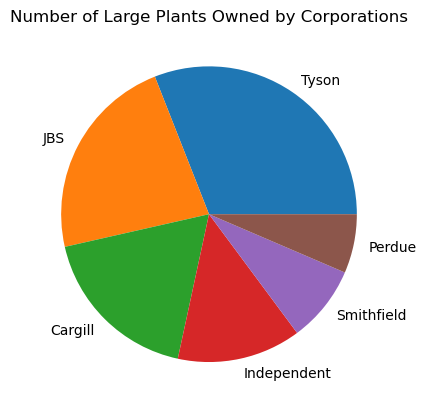

In [12]:
# Number of large plants but shows only Corps who have 10 or more plants
df_large = df_FSIS[df_FSIS["Size"] == "Large"]
large_plant_corps = df_large["Parent Corporation"].value_counts()
large_plant_corps[large_plant_corps >= 10].plot(kind="pie", title="Number of Large Plants Owned by Corporations", ylabel="")

len(large_plant_corps)

<AxesSubplot: title={'center': 'Number of Large Plants by State'}, ylabel='Count'>

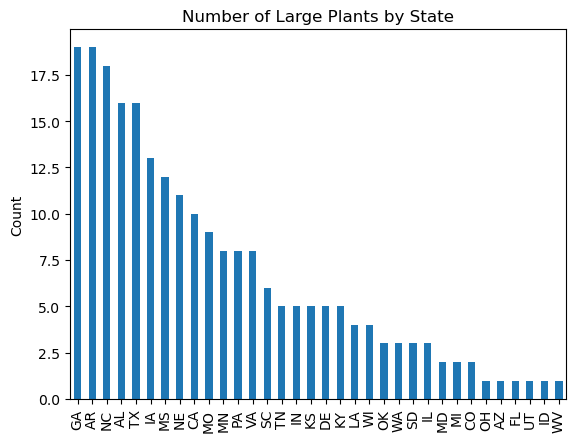

In [13]:
df_large["State"].value_counts().plot(kind="bar", title="Number of Large Plants by State", ylabel="Count")

#### Large Tyson Plants

<AxesSubplot: title={'center': 'Large Tyson Chicken Processing Plants by State'}, ylabel='Count'>

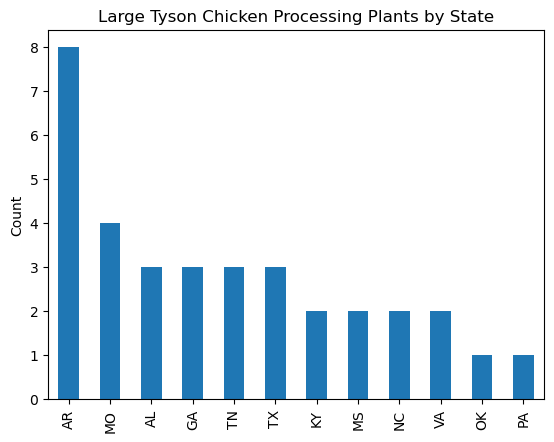

In [14]:
df_tyson = df_large[(df_large["Parent Corporation"] == "Tyson")]
df_tyson_chicken = df_tyson[(df_tyson["Animals Processed"] == "Chicken")]
df_tyson_chicken["State"].value_counts().plot(kind="bar", title="Large Tyson Chicken Processing Plants by State", ylabel="Count")

#### Large JBS Plants

<AxesSubplot: title={'center': 'Large JBS Chicken Processing Plants by State'}, ylabel='Count'>

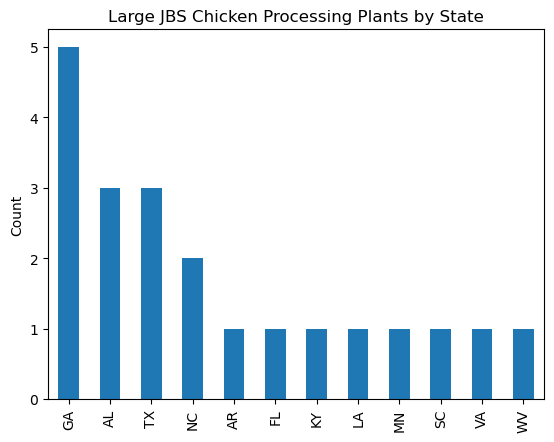

In [15]:
df_JBS = df_large[(df_large["Parent Corporation"] == "JBS")]
df_JBS_chicken = df_JBS[(df_JBS["Animals Processed"] == "Chicken")]
df_JBS_chicken["State"].value_counts().plot(kind="bar", title="Large JBS Chicken Processing Plants by State", ylabel="Count")

## Exploring 1997-2022 Infogroup Data

### Import Data

In [16]:
df_IG = pd.read_csv("../../data/1997-2022_poultry_plants.csv")
df_IG.head(2)

/var/folders/ly/2syhzlz16r73t4fqm0kkkz2h0000gn/T/ipykernel_6426/1297256158.py:1: DtypeWarning: Columns (32,56,57,62,63,65,67,70,76,77,78,79,82,83,84,87,88,89,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df_IG = pd.read_csv("../../data/1997-2022_poultry_plants.csv")


,Unnamed: 0.1,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,UNNAMED: 0,FIRST NAME,LAST NAME,PHONE NUMBER,FAX AREA CODE,FAX PHONE NUMBER,PROFESSIONAL TITLE,TITLE CODE,GENDER,EMPLOYEE SIZE (6) - CORPORATE,MODELED EMPLOYEE SIZE,SALES VOLUME (9) - CORPORATE,CALL STATUS CODE,NAME STANDARIZATION FLAG,SQUARE FOOTAGE,AD SIZE CODE,BOOK NUMBER,ARCHIVE VERSION MONTH,NEW ADD DATE,TELERESEARCH UPDATE DATE,YEAR 1ST APPEARED,LOCATION NAME,LANDMARK ADDRESS,LANDMARK CITY,LANDMARK STATE,LANDMARK ZIPCODE,LANDMARK ZIP4,MAILING ADDRESS,MAILING CITY,MAILING STATE,MAILING ZIPCODE,MAILING ZIP4,MAILING ADDRESS FLAG,UNIT NUMBER,UNIT TYPE,NAICS CODE,PROFESSIONAL SIC FLAG,SIC6_DESCRIPTIONS (PRIMARYSIC)
0,0,11380.0,COOTERS FARM,1784 TUCK WILKES RD,NOXAPATER,MS,39346.0,9311.0,159.0,662.0,2.0,I,I,201501.0,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,25401.0,POULTRY FARMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,67803.0,1025.0,278505.0,9.0,NaN,NaN,NaN,NaN,737560971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,950200.0,4.0,33.011665,-89.126923,P,0.0,NaN,0.0,28159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,21772.0,TYSON FOODS INC,47283 SD HIGHWAY 34,COLMAN,SD,57017.0,6543.0,101.0,605.0,2.0,A,A,201104.0,MEAT PRODUCTS (MFRS),31161103.0,ANIMAL (EXCEPT POULTRY) SLAUGHTERING,515403.0,LIVESTOCK-DEALERS (WHLS),25401.0,POULTRY FARMS,201501.0,POULTRY PROCESSING PLANTS (MFRS),204803.0,FEED-MANUFACTURERS,207702.0,RENDERING COMPANIES (MFRS),2022,NaN,1.0,319.0,2.0,NaN,NaN,NaN,NaN,303413538,NaN,7537913.0,1850.0,NaN,I,NaN,NaN,NaN,3.0,959600.0,2.0,43.978463,-96.753100,P,0.0,NaN,0.0,46101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What's in this dataframe?

In [17]:
df_IG.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'COMPANY', 'ADDRESS LINE 1', 'CITY',
       'STATE', 'ZIPCODE', 'ZIP4', 'COUNTY CODE', 'AREA CODE', 'IDCODE',
       'LOCATION EMPLOYEE SIZE CODE', 'LOCATION SALES VOLUME CODE',
       'PRIMARY SIC CODE', 'SIC6_DESCRIPTIONS', 'PRIMARY NAICS CODE',
       'NAICS8 DESCRIPTIONS', 'SIC CODE', 'SIC6_DESCRIPTIONS (SIC)',
       'SIC CODE 1', 'SIC6_DESCRIPTIONS (SIC1)', 'SIC CODE 2',
       'SIC6_DESCRIPTIONS(SIC2)', 'SIC CODE 3', 'SIC6_DESCRIPTIONS(SIC3)',
       'SIC CODE 4', 'SIC6_DESCRIPTIONS(SIC4)', 'ARCHIVE VERSION YEAR',
       'YELLOW PAGE CODE', 'EMPLOYEE SIZE (5) - LOCATION',
       'SALES VOLUME (9) - LOCATION', 'BUSINESS STATUS CODE',
       'INDUSTRY SPECIFIC FIRST BYTE', 'YEAR ESTABLISHED', 'OFFICE SIZE CODE',
       'COMPANY HOLDING STATUS', 'ABI', 'SUBSIDIARY NUMBER', 'PARENT NUMBER',
       'PARENT ACTUAL EMPLOYEE SIZE', 'PARENT ACTUAL SALES VOLUME',
       'PARENT EMPLOYEE SIZE CODE', 'PARENT SALES VOLUME CODE', 'SITE NUMBER',
       'ADD

In [34]:
df_IG.dtypes

Unnamed: 0.1                        int64
Unnamed: 0                        float64
COMPANY                            object
ADDRESS LINE 1                     object
CITY                               object
STATE                              object
ZIPCODE                           float64
ZIP4                              float64
COUNTY CODE                       float64
AREA CODE                         float64
IDCODE                            float64
LOCATION EMPLOYEE SIZE CODE        object
LOCATION SALES VOLUME CODE         object
PRIMARY SIC CODE                  float64
SIC6_DESCRIPTIONS                  object
PRIMARY NAICS CODE                float64
NAICS8 DESCRIPTIONS                object
SIC CODE                          float64
SIC6_DESCRIPTIONS (SIC)            object
SIC CODE 1                        float64
SIC6_DESCRIPTIONS (SIC1)           object
SIC CODE 2                        float64
SIC6_DESCRIPTIONS(SIC2)            object
SIC CODE 3                        

In [19]:
## Turning NaNs to 0s and turning float64s into int64s
df_IG['YEAR ESTABLISHED'] = df_IG['YEAR ESTABLISHED'].fillna(0)
df_IG['YEAR ESTABLISHED'] = df_IG['YEAR ESTABLISHED'].apply(np.int64)

In [20]:
df_IG['YEAR 1ST APPEARED'] = df_IG['YEAR 1ST APPEARED'].fillna(0)
df_IG['YEAR 1ST APPEARED'] = df_IG['YEAR 1ST APPEARED'].apply(np.int64)

In [21]:
df_IG['COMPANY HOLDING STATUS'] = df_IG['COMPANY HOLDING STATUS'].fillna(0)
df_IG['COMPANY HOLDING STATUS'] = df_IG['COMPANY HOLDING STATUS'].apply(np.int64)

In [22]:
df_IG['PARENT NUMBER'] = df_IG['PARENT NUMBER'].fillna(0)
df_IG['PARENT NUMBER'] = df_IG['PARENT NUMBER'].apply(np.int64)

### How many businesses are repeated across years?

In [23]:
unique_biz = df_IG.drop_duplicates(subset=['ABI'])
print("There are", len(unique_biz), "businesses with unique ABI codes within this dataframe")

There are 2168 businesses with unique ABI codes within this dataframe


In [25]:
# What states have the most unique processing plants?
unique_biz.groupby('STATE').count()['Unnamed: 0.1'].sort_values(ascending=False)

STATE
AR    208
GA    177
TX    168
AL    137
NC    125
CA    113
MS     96
MN     89
MO     72
OH     70
PA     63
IA     54
VA     52
OK     49
NY     49
IN     46
SC     41
TN     40
IL     39
WI     38
FL     36
NE     36
MI     34
MD     33
LA     32
KY     31
CO     27
NJ     25
DE     25
KS     19
SD     19
MA     15
WA     14
ME     13
UT     12
OR     11
HI     10
NH      8
ID      8
WV      6
RI      5
CT      5
AZ      5
ND      4
DC      2
VT      2
AK      2
NV      1
NM      1
MT      1
Name: Unnamed: 0.1, dtype: int64

### Do columns with similar names include the same data?

In [29]:
# These are not the same

unique_biz['PRIMARY NAICS CODE'].equals(unique_biz['NAICS CODE'])

False

In [30]:
unique_biz['YEAR ESTABLISHED'].value_counts()

0       1423
1935      28
1970      20
1925      19
1989      17
2002      17
1947      16
1972      16
1946      14
2006      13
1940      13
1982      13
1958      13
1933      12
1959      12
2004      12
1938      12
1949      11
1974      11
1948      11
1969      11
1975      10
1990      10
1981      10
1971      10
1987      10
1957      10
2008      10
1967      10
1988      10
2009       9
1983       9
1926       9
1968       9
1950       9
1930       9
1980       9
1973       8
2019       8
1963       8
1952       8
1977       8
1954       8
1939       8
1965       8
1984       7
1985       7
1944       7
1956       7
1960       7
1955       7
2005       7
1953       7
1945       7
1993       7
2003       6
2007       6
1976       6
1964       6
1961       6
1943       5
1991       5
1951       5
1978       5
2021       5
1942       5
2011       5
1920       5
1992       4
1928       4
1923       4
1979       4
2018       4
2001       4
1994       4
1919       4
1966       3

In [31]:
## Clearly not the same as Year Established

unique_biz['YEAR 1ST APPEARED'].value_counts()

0       2130
2018       5
2019       4
2012       3
2016       3
2017       2
2000       2
2008       2
2003       2
2011       2
1989       1
2014       1
2006       1
2002       1
1984       1
2015       1
1997       1
1987       1
1995       1
2013       1
2010       1
2007       1
2001       1
Name: YEAR 1ST APPEARED, dtype: int64

### What columns might be useful to us?

In [33]:
# "Indicates if company is a public company, private company, or a branch"
# 0 = private
# 1 = public
# 2 = branch

unique_biz['COMPANY HOLDING STATUS'].unique()

array([0, 1, 2])

In [41]:
df_IG['COMPANY HOLDING STATUS'].value_counts()
##looks like most plants are classified as private

0    15875
2      354
1      114
Name: COMPANY HOLDING STATUS, dtype: int64

In [42]:
# "Identifies corporate parent of the business and also serves as the ABI number for HQ"
unique_biz['PARENT NUMBER'].astype(str).value_counts().head(25)

## IN ORDER: independent, Tyson, independent, JBS, Hormel, Cargil
#### Foster, Sanderson, Koch, Mountaire, Perdue, Continental Grain,
#### House of Raeford, Pilgrim's Pride, George's Inc, Cal-main Foods,
#### Conagra Brands, Simmons Foods, Peco Foods, NOT IN DATABASE


0            1127
7537913       334
987289857     130
7516065        47
453614844      45
9564816        38
441416815      38
517549762      36
835874538      33
7529217        31
433353331      29
513523         25
436136139      25
512392         22
431481290      20
7509045        13
7534076        12
531052413      11
1941509        11
643752900       9
401092234       7
4034419         7
415574180       5
1081025         5
7639115         5
Name: PARENT NUMBER, dtype: int64

#### Using ABI to track businesses across years

##### I.E. ABI 512247248

In [43]:
ex_ABI = df_IG.loc[df_IG.ABI == 512247248].reset_index(drop=True)
ex_ABI.head(3)

,Unnamed: 0.1,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,UNNAMED: 0,FIRST NAME,LAST NAME,PHONE NUMBER,FAX AREA CODE,FAX PHONE NUMBER,PROFESSIONAL TITLE,TITLE CODE,GENDER,EMPLOYEE SIZE (6) - CORPORATE,MODELED EMPLOYEE SIZE,SALES VOLUME (9) - CORPORATE,CALL STATUS CODE,NAME STANDARIZATION FLAG,SQUARE FOOTAGE,AD SIZE CODE,BOOK NUMBER,ARCHIVE VERSION MONTH,NEW ADD DATE,TELERESEARCH UPDATE DATE,YEAR 1ST APPEARED,LOCATION NAME,LANDMARK ADDRESS,LANDMARK CITY,LANDMARK STATE,LANDMARK ZIPCODE,LANDMARK ZIP4,MAILING ADDRESS,MAILING CITY,MAILING STATE,MAILING ZIPCODE,MAILING ZIP4,MAILING ADDRESS FLAG,UNIT NUMBER,UNIT TYPE,NAICS CODE,PROFESSIONAL SIC FLAG,SIC6_DESCRIPTIONS (PRIMARYSIC),PARENT NAME
0,2,21912.0,SIMMONS FOODS INC,2101 TWIN CIRCLE DR,VAN BUREN,AR,72956.0,6027.0,33.0,479.0,2.0,H,H,201501.0,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,600.0,95134.0,2.0,NaN,0,NaN,0,512247248,NaN,7534076,100.0,1401863.0,F,K,NaN,NaN,7.0,20501.0,2.0,35.428061,-94.336725,P,22900.0,2.0,0.0,5033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Simmons Foods Inc
1,1045,NaN,SIMMONS FOODS INC,2101 TWIN CIRCLE DR,VAN BUREN,AR,72956.0,6027.0,33.0,479.0,2.0,H,H,201501.0,NaN,31161501.0,POULTRY PROCESSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN,600.0,95134.0,2.0,NaN,0,NaN,0,512247248,NaN,7534076,100.0,1232440.0,F,K,NaN,NaN,7.0,20501.0,2.0,35.428061,-94.336725,P,22900.0,2.0,0.0,5033.0,5479275.0,KAMERON,SLATER,4103035.0,NaN,NaN,NaN,K,M,NaN,A,NaN,M,9.0,8.0,NaN,NaN,7.0,199910.0,202006.0,1999,SIMMONS FOODS INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POULTRY PROCESSING PLANTS (MFRS),Simmons Foods Inc
2,1507,NaN,SIMMONS FOODS INC,2101 TWIN CIRCLE DR,VAN BUREN,AR,72956.0,6027.0,33.0,479.0,2.0,H,H,201501.0,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,600.0,95134.0,2.0,NaN,0,NaN,0,512247248,NaN,7534076,100.0,3675689.0,F,K,NaN,NaN,7.0,20501.0,2.0,35.428061,-94.336725,P,22900.0,2.0,0.0,5033.0,373131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Simmons Foods Inc


In [44]:
df_IG['ABI'].value_counts().sort_values(ascending=False)
#Some businesses appear across all 26 years

886755743    26
4704185      26
1081025      26
9489527      26
1975044      26
             ..
452230816     1
403317225     1
8854671       1
417108974     1
503201196     1
Name: ABI, Length: 2168, dtype: int64

In [45]:
## Create a dictionary mapping Parent Numbers/ABIs to real parent corporation names
# Grunt work done in finding-ABIS.ipynb notebook

ABI_dict = dict({np.nan: 'None', 7537913.0: 'Tyson Foods Inc', 0.0: 'None', 987289857.0: 'JBS USA',
                7516065.0: 'Hormel Foods Corp',  453614844.0: 'Cargil Inc', 9564816.0: 'Foster Farms',
                441416815.0: 'Sanderson Farms Inc', 517549762.0: 'Koch Foods Inc', 835874538.0: 'Mountaire Corp', 
                7529217.0: 'Perdue Farms Inc', 433353331.0: 'Continental Grain Co', 513523.0: 'House of Raeford Farms Inc', 
                436136139.0: "Pilgrim's Pride Corp", 512392.0: "George's Inc", 431481290.0: 'Cal-main Foods Inc', 
                7509045.0: "Conagra Brands Inc", 7534076.0: "Simmons Foods Inc", 531052413.0: "Peco Foods Inc",  
                1941509.0: "UNKNOWN"})
print(type(ABI_dict))

<class 'dict'>


In [46]:
df_IG['PARENT NAME'] = df_IG['PARENT NUMBER'].map(ABI_dict)
df_IG['PARENT NAME'] = df_IG['PARENT NAME'].fillna('Small Biz')
df_IG.head(3)

,Unnamed: 0.1,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,UNNAMED: 0,FIRST NAME,LAST NAME,PHONE NUMBER,FAX AREA CODE,FAX PHONE NUMBER,PROFESSIONAL TITLE,TITLE CODE,GENDER,EMPLOYEE SIZE (6) - CORPORATE,MODELED EMPLOYEE SIZE,SALES VOLUME (9) - CORPORATE,CALL STATUS CODE,NAME STANDARIZATION FLAG,SQUARE FOOTAGE,AD SIZE CODE,BOOK NUMBER,ARCHIVE VERSION MONTH,NEW ADD DATE,TELERESEARCH UPDATE DATE,YEAR 1ST APPEARED,LOCATION NAME,LANDMARK ADDRESS,LANDMARK CITY,LANDMARK STATE,LANDMARK ZIPCODE,LANDMARK ZIP4,MAILING ADDRESS,MAILING CITY,MAILING STATE,MAILING ZIPCODE,MAILING ZIP4,MAILING ADDRESS FLAG,UNIT NUMBER,UNIT TYPE,NAICS CODE,PROFESSIONAL SIC FLAG,SIC6_DESCRIPTIONS (PRIMARYSIC),PARENT NAME
0,0,11380.0,COOTERS FARM,1784 TUCK WILKES RD,NOXAPATER,MS,39346.0,9311.0,159.0,662.0,2.0,I,I,201501.0,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,25401.0,POULTRY FARMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,67803.0,1025.0,278505.0,9.0,NaN,0,NaN,0,737560971,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,950200.0,4.0,33.011665,-89.126923,P,0.0,NaN,0.0,28159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,1,21772.0,TYSON FOODS INC,47283 SD HIGHWAY 34,COLMAN,SD,57017.0,6543.0,101.0,605.0,2.0,A,A,201104.0,MEAT PRODUCTS (MFRS),31161103.0,ANIMAL (EXCEPT POULTRY) SLAUGHTERING,515403.0,LIVESTOCK-DEALERS (WHLS),25401.0,POULTRY FARMS,201501.0,POULTRY PROCESSING PLANTS (MFRS),204803.0,FEED-MANUFACTURERS,207702.0,RENDERING COMPANIES (MFRS),2022,NaN,1.0,319.0,2.0,NaN,0,NaN,0,303413538,NaN,7537913,1850.0,NaN,I,NaN,NaN,NaN,3.0,959600.0,2.0,43.978463,-96.753100,P,0.0,NaN,0.0,46101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tyson Foods Inc
2,2,21912.0,SIMMONS FOODS INC,2101 TWIN CIRCLE DR,VAN BUREN,AR,72956.0,6027.0,33.0,479.0,2.0,H,H,201501.0,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,600.0,95134.0,2.0,NaN,0,NaN,0,512247248,NaN,7534076,100.0,1401863.0,F,K,NaN,NaN,7.0,20501.0,2.0,35.428061,-94.336725,P,22900.0,2.0,0.0,5033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Simmons Foods Inc


#### Grouping by ABI and Parent Number

##### Could be used to see if smaller plants were bought over time

In [47]:
ABI_and_parent = df_IG.groupby('ABI')['PARENT NAME'].apply(list).reset_index()
ABI_and_parent

,ABI,PARENT NAME
0,2006,"[Small Biz, Small Biz, Small Biz, Small Biz, S..."
1,2055,"[None, None, None, None, None, None]"
2,15495,"[None, Koch Foods Inc, Koch Foods Inc, Koch Fo..."
3,15503,[Small Biz]
4,17947,"[None, None]"
...,...,...
2163,997248679,"[None, None, None, None, None, None, None, Non..."
2164,997432166,"[None, None]"
2165,998302269,"[None, None]"
2166,998670129,"[None, None]"


In [48]:
## iterate through each row, checking if the list of parent corporations in column 'PARENT NAME' changes over the years
# CHANGE_BOOL is either false or the name of the parent company that bought the plant
# CHANGE_NUM is either 1 (this plant was bought) or 0 (this plant has never changed ownership)

CHANGE_BOOL = np.array([])
CHANGE_NUM = np.array([])

for row in ABI_and_parent['PARENT NAME']:
    start = row[0]
    chk = True
    for x in row:
        if start != x:
            chk = False
            break
    if (chk == False):
        CHANGE_BOOL = np.append(CHANGE_BOOL, x)
        CHANGE_NUM = np.append(CHANGE_NUM, 1)
    else: 
        CHANGE_BOOL = np.append(CHANGE_BOOL, "False")  
        CHANGE_NUM = np.append(CHANGE_NUM, 0)

In [49]:
ABI_and_parent['CHANGE_BOOL'] = CHANGE_BOOL
ABI_and_parent['CHANGE_NUM'] = CHANGE_NUM
ABI_and_parent

,ABI,PARENT NAME,CHANGE_BOOL,CHANGE_NUM
0,2006,"[Small Biz, Small Biz, Small Biz, Small Biz, S...",False,0.0
1,2055,"[None, None, None, None, None, None]",False,0.0
2,15495,"[None, Koch Foods Inc, Koch Foods Inc, Koch Fo...",Koch Foods Inc,1.0
3,15503,[Small Biz],False,0.0
4,17947,"[None, None]",False,0.0
...,...,...,...,...
2163,997248679,"[None, None, None, None, None, None, None, Non...",False,0.0
2164,997432166,"[None, None]",False,0.0
2165,998302269,"[None, None]",False,0.0
2166,998670129,"[None, None]",False,0.0


In [50]:
print("There are", ABI_and_parent['CHANGE_NUM'].sum(), "plants that were bought-up over this time period")
placeholder = ABI_and_parent[['ABI', 'CHANGE_BOOL', 'CHANGE_NUM']]

There are 282.0 plants that were bought-up over this time period


### Combining Infogroup Work Into One Master DF

In [51]:
master_df = pd.merge(df_IG, placeholder, on='ABI')
master_df.head(3)

,Unnamed: 0.1,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,UNNAMED: 0,FIRST NAME,LAST NAME,PHONE NUMBER,FAX AREA CODE,FAX PHONE NUMBER,PROFESSIONAL TITLE,TITLE CODE,GENDER,EMPLOYEE SIZE (6) - CORPORATE,MODELED EMPLOYEE SIZE,SALES VOLUME (9) - CORPORATE,CALL STATUS CODE,NAME STANDARIZATION FLAG,SQUARE FOOTAGE,AD SIZE CODE,BOOK NUMBER,ARCHIVE VERSION MONTH,NEW ADD DATE,TELERESEARCH UPDATE DATE,YEAR 1ST APPEARED,LOCATION NAME,LANDMARK ADDRESS,LANDMARK CITY,LANDMARK STATE,LANDMARK ZIPCODE,LANDMARK ZIP4,MAILING ADDRESS,MAILING CITY,MAILING STATE,MAILING ZIPCODE,MAILING ZIP4,MAILING ADDRESS FLAG,UNIT NUMBER,UNIT TYPE,NAICS CODE,PROFESSIONAL SIC FLAG,SIC6_DESCRIPTIONS (PRIMARYSIC),PARENT NAME,CHANGE_BOOL,CHANGE_NUM
0,0,11380.0,COOTERS FARM,1784 TUCK WILKES RD,NOXAPATER,MS,39346.0,9311.0,159.0,662.0,2.0,I,I,201501.0,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,25401.0,POULTRY FARMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,67803.0,1025.0,278505.0,9.0,NaN,0,NaN,0,737560971,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,950200.0,4.0,33.011665,-89.126923,P,0.0,NaN,0.0,28159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,False,0.0
1,1351,NaN,COOTERS FARM,1784 TUCK WILKES RD,NOXAPATER,MS,39346.0,9311.0,159.0,662.0,2.0,I,I,201501.0,NaN,31161501.0,POULTRY PROCESSING,25401.0,POULTRY FARMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,67803.0,1025.0,279380.0,9.0,NaN,0,NaN,0,737560971,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,950200.0,4.0,33.011665,-89.126923,P,0.0,NaN,0.0,28159.0,5483171.0,NaN,NaN,7739884.0,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,X,NaN,8.0,B,NaN,7.0,201912.0,201808.0,2018,COOTERS FARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11234001.0,NaN,POULTRY PROCESSING PLANTS (MFRS),None,False,0.0
2,1579,NaN,COOTERS FARM,1784 TUCK WILKES RD,NOXAPATER,MS,39346.0,9311.0,159.0,662.0,2.0,I,C,201501.0,POULTRY PROCESSING PLANTS (MFRS),31161501.0,POULTRY PROCESSING,25401.0,POULTRY FARMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,67803.0,1025.0,1032.0,9.0,NaN,0,NaN,0,737560971,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,950200.0,4.0,33.011665,-89.126923,P,0.0,NaN,0.0,28159.0,1759138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,False,0.0


In [52]:
master_df.loc[master_df.CHANGE_NUM == 1].drop_duplicates(subset=['ABI']).reset_index(drop=True).head(10)
master = master_df[['COMPANY', 'ADDRESS LINE 1', 'CITY', 'STATE', 'ZIPCODE', 'PRIMARY SIC CODE', 
                    'ARCHIVE VERSION YEAR', 'YEAR ESTABLISHED', 'ABI', 'COMPANY HOLDING STATUS', 'PARENT NUMBER', 'LATITUDE',
                    'LONGITUDE', 'YEAR 1ST APPEARED', 'PARENT NAME', 'CHANGE_BOOL', 'CHANGE_NUM']]
master.head(3)

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,PRIMARY SIC CODE,ARCHIVE VERSION YEAR,YEAR ESTABLISHED,ABI,COMPANY HOLDING STATUS,PARENT NUMBER,LATITUDE,LONGITUDE,YEAR 1ST APPEARED,PARENT NAME,CHANGE_BOOL,CHANGE_NUM
0,COOTERS FARM,1784 TUCK WILKES RD,NOXAPATER,MS,39346.0,201501.0,2022,0,737560971,0,0,33.011665,-89.126923,0,None,False,0.0
1,COOTERS FARM,1784 TUCK WILKES RD,NOXAPATER,MS,39346.0,201501.0,2021,0,737560971,0,0,33.011665,-89.126923,2018,None,False,0.0
2,COOTERS FARM,1784 TUCK WILKES RD,NOXAPATER,MS,39346.0,201501.0,2020,0,737560971,0,0,33.011665,-89.126923,0,None,False,0.0


In [53]:
master.isnull().sum()

COMPANY                     4
ADDRESS LINE 1            220
CITY                        0
STATE                       0
ZIPCODE                     0
PRIMARY SIC CODE            0
ARCHIVE VERSION YEAR        0
YEAR ESTABLISHED            0
ABI                         0
COMPANY HOLDING STATUS      0
PARENT NUMBER               0
LATITUDE                    3
LONGITUDE                   3
YEAR 1ST APPEARED           0
PARENT NAME                 0
CHANGE_BOOL                 0
CHANGE_NUM                  0
dtype: int64

In [54]:
master = master.dropna(subset = ['COMPANY', 'LATITUDE', 'LONGITUDE'])

In [54]:
PATH = "../../data/master-df.csv"
master.to_csv(PATH)